<a href="https://colab.research.google.com/github/Atha-web/CityHospital.Web/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [5]:
vocab_size = 10000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [7]:
maxlen = 200
x_train_pad = pad_sequences(X_train, maxlen=maxlen, padding='post', truncating = 'post')
x_test_pad = pad_sequences(X_test, maxlen=maxlen, padding='post', truncating = 'post')

In [8]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(x_train_pad, y_train, epochs=24, batch_size=100, validation_data=(x_test_pad, y_test))

Epoch 1/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5170 - loss: 0.6924 - val_accuracy: 0.5432 - val_loss: 0.6905
Epoch 2/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5840 - loss: 0.6631 - val_accuracy: 0.5797 - val_loss: 0.6567
Epoch 3/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6767 - loss: 0.5732 - val_accuracy: 0.7047 - val_loss: 0.5877
Epoch 4/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7273 - loss: 0.5231 - val_accuracy: 0.5930 - val_loss: 0.6983
Epoch 5/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7873 - loss: 0.4519 - val_accuracy: 0.8161 - val_loss: 0.4245
Epoch 6/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9179 - loss: 0.2186 - val_accuracy: 0.8279 - val_loss: 0.4151
Epoch 7/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9503 - loss: 0.1498 - val_accuracy: 0.8317 - val_loss: 0.4514
Epoch 8/24
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9711 - loss: 0.0974 - val_acc

In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Train loss vs Validation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend([ 'train' , 'validation' ], loc= 'upper right')
  plt.show()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Train accuracy vs Validation Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend([ 'train' , 'validation' ], loc= 'upper right')
  plt.show()

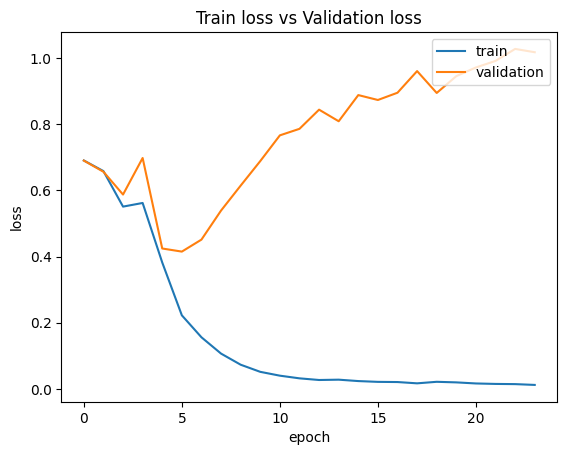

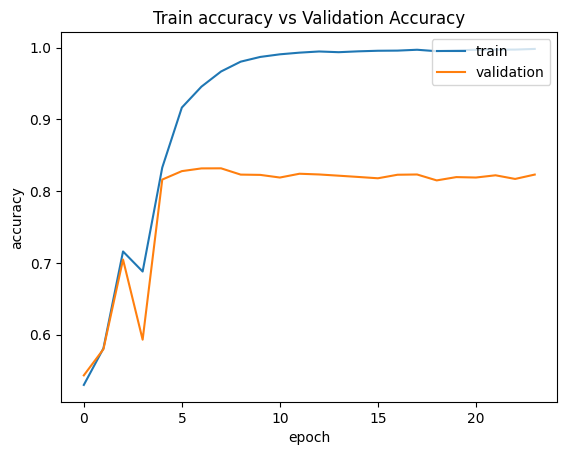

In [13]:

plot_history(history)

pre trained model

In [14]:
from transformers import BertTokenizer, TFBertForSequenceClassification

In [20]:
word_index = imdb.get_word_index()
index_words = {v: k for k , v in word_index.items()}

In [21]:
def decode_review(review_seq):
  return ' '.join([index_words.get(idx - 3, '?') for idx in review_seq])

In [22]:
index_words.get(30)

'at'

In [23]:
decode_review(X_train[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [19]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [24]:
from transformers import pipeline

In [26]:
classifier = pipeline('sentiment-analysis', model ="distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [29]:
reviews = [decode_review(seq) for seq in X_train[:10]]

In [30]:
results = classifier(reviews, truncation=True, padding=True, max_length=512)

In [31]:
results

[{'label': 'POSITIVE', 'score': 0.9989377856254578},
 {'label': 'NEGATIVE', 'score': 0.9994951486587524},
 {'label': 'NEGATIVE', 'score': 0.9997963309288025},
 {'label': 'POSITIVE', 'score': 0.9958592057228088},
 {'label': 'NEGATIVE', 'score': 0.9997186064720154},
 {'label': 'NEGATIVE', 'score': 0.9989789724349976},
 {'label': 'POSITIVE', 'score': 0.9984205961227417},
 {'label': 'NEGATIVE', 'score': 0.9996565580368042},
 {'label': 'POSITIVE', 'score': 0.999222993850708},
 {'label': 'NEGATIVE', 'score': 0.998845100402832}]

TRansfer

In [40]:
X_train_text = [decode_review(seq) for seq in X_train[:100]]
X_test_text = [decode_review(seq) for seq in X_test[:50]]

In [36]:
from transformers import BertTokenizer, TFBertForSequenceClassification

In [37]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
train_encodings = tokenizer(X_train_text, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test_text, truncation=True, padding=True, max_length=128)

In [47]:
import tensorflow as tf
train_labels = tf.convert_to_tensor(y_train[:100])
test_labels = tf.convert_to_tensor(y_test[:50])

In [48]:
train_data = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
test_data = tf.data.Dataset.from_tensor_slices((dict(test_encodings),
    test_labels
))

In [54]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=5e-5)

model.compile(optimizer='adam', loss='sparse_categorical_crossentopy', metrics=['accuracy'])

In [55]:
model.fit(train_data, validation_data=test_data, epochs=2)

Epoch 1/2


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1398, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1381, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1370, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/transformers/modeling_tf_utils.py", line 1672, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_fileyrn7ubkz.py", line 37, in tf__run_call_with_unpacked_inputs
        retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
    File "/tmp/__autograph_generated_filetts73vjx.py", line 17, in tf__call
        outputs = ag__.converted_call(ag__.ld(self).bert, (), dict(input_ids=ag__.ld(input_ids), attention_mask=ag__.ld(attention_mask), token_type_ids=ag__.ld(token_type_ids), position_ids=ag__.ld(position_ids), head_mask=ag__.ld(head_mask), inputs_embeds=ag__.ld(inputs_embeds), output_attentions=ag__.ld(output_attentions), output_hidden_states=ag__.ld(output_hidden_states), return_dict=ag__.ld(return_dict), training=ag__.ld(training)), fscope)
    File "/tmp/__autograph_generated_fileyrn7ubkz.py", line 37, in tf__run_call_with_unpacked_inputs
        retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
    File "/tmp/__autograph_generated_filem1eugtl3.py", line 76, in tf__call
        (batch_size, seq_length) = ag__.ld(input_shape)

    ValueError: Exception encountered when calling layer 'tf_bert_for_sequence_classification' (type TFBertForSequenceClassification).
    
    in user code:
    
        File "/usr/local/lib/python3.10/dist-packages/transformers/modeling_tf_utils.py", line 1734, in run_call_with_unpacked_inputs  *
            return func(self, **unpacked_inputs)
        File "/usr/local/lib/python3.10/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 1746, in call  *
            outputs = self.bert(
        File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/tmp/__autograph_generated_fileyrn7ubkz.py", line 37, in tf__run_call_with_unpacked_inputs
            retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
        File "/tmp/__autograph_generated_filem1eugtl3.py", line 76, in tf__call
            (batch_size, seq_length) = ag__.ld(input_shape)
    
        ValueError: Exception encountered when calling layer 'bert' (type TFBertMainLayer).
        
        in user code:
        
            File "/usr/local/lib/python3.10/dist-packages/transformers/modeling_tf_utils.py", line 1734, in run_call_with_unpacked_inputs  *
                return func(self, **unpacked_inputs)
            File "/usr/local/lib/python3.10/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 873, in call  *
                batch_size, seq_length = input_shape
        
            ValueError: not enough values to unpack (expected 2, got 1)
        
        
        Call arguments received by layer 'bert' (type TFBertMainLayer):
          • input_ids=tf.Tensor(shape=(128,), dtype=int32)
          • attention_mask=tf.Tensor(shape=(128,), dtype=int32)
          • token_type_ids=tf.Tensor(shape=(128,), dtype=int32)
          • position_ids=None
          • head_mask=None
          • inputs_embeds=None
          • encoder_hidden_states=None
          • encoder_attention_mask=None
          • past_key_values=None
          • use_cache=None
          • output_attentions=False
          • output_hidden_states=False
          • return_dict=True
          • training=True
    
    
    Call arguments received by layer 'tf_bert_for_sequence_classification' (type TFBertForSequenceClassification):
      • input_ids={'input_ids': 'tf.Tensor(shape=(128,), dtype=int32)', 'token_type_ids': 'tf.Tensor(shape=(128,), dtype=int32)', 'attention_mask': 'tf.Tensor(shape=(128,), dtype=int32)'}
      • attention_mask=None
      • token_type_ids=None
      • position_ids=None
      • head_mask=None
      • inputs_embeds=None
      • output_attentions=None
      • output_hidden_states=None
      • return_dict=None
      • labels=None
      • training=True
